# 1. Introduction
- Nama: Julius William
- Batch: HCK - 033

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# 2. Buisness Understanding

## 2.1 Latar Belakang
Sebuah perusahaan asuransi mobil ingin melakukan evaluasi terhadap ajuan-ajuan dan klaim asuransi yang terjadi belakangan ini. Perusahaan sudah mengumpulkan datanya yang dapat dilihat di 'VehicleINsuranceData.csv'. Denagn tujuan untuk meningkatkan customer lifetime value (CLV), yaitu sebuah metrik yang mengukur seberapa berharga pelanggan tersebut ke perusahaan, perusahaan ingin mencari tau faktor-faktor apa saja yang mempengaruhi kenaikan CLV ini.

## 2.2 Problem Statement

### 2.2.1 SMART
- Specific  : Meningkatkan rata-rata CLV.
- Measure   : Meningkatkan rata-rata CLV sebesar 10%.
- Achivable : Dengan ada tambahan informasi faktor-faktor yang mempengaruhi, harga premi dapat disesuaikan untuk meningkatkan keuntungan.
- Relevant  : Jika ini terjadi maka keuntungan perusahaan akan meningkat.
- Time      : Akan dilakukan dalam jangka waktu 1 tahun. Untuk mencapai target penumbuhan perusahaan sebesar 10%/ tahun.

### 2.2.2 Problem Statement
Meningkatkan rata-rata CLV sebesar 10% dalam 1 tahun dengan cari menganalisa faktor-faktor yang mempengaruhi nilai CLV sehingga harga premi dapat disesuaikan berdasarkan faktor-faktor tersebut.

## 2.3 Penjabaran Masalah
1. Berapa nilai rata-rata CLV?
2. Dimana paling banyak terjadinya ajuan komplain?
3. Rasio Perempuan/ Laki-laki?
4. Apakah ada perbedaan signifikan anatra rata-rata CLV laki-laki dan perempuan?
5. Apa saja faktor-faktor yang mempengaruhi nilai CLV?
6. Apakah nilai CLV  mempengaruhi kemungkinan respon yes?


# 3. Data Understanding

## 3.1 Data Description

Data 'VechileInsuranceData' yang digunakan diambil dari website kaggle https://www.kaggle.com/datasets/junglisher/vehicle-insurance-data/data. Data tersebut memiliki 22 kolom dan 8360 baris. Isi dari kolom data sebagai berikut:
- ID (int)      : ID dari pemegang polis
- CLV (FLoat)     : Customer Lifetime Value adalah nilai pelanggan untuk perusahaan. Semakin besar maka akan lebih menguntungkan untuk perusahaan.
- Response      : Respon ajuan klaim. Yes berarti di terima, NO berarti ditolak.
- Coverage (Str): Tipe protekssi asuransi
- Education (str)  : Edukasi terakhir pemegang polis.
- Gender (str)    : Jenis kelamin pemegang polis.
- Location.Code (str) : kode lokasi pemegang polis.
- Marital.Satatus (str) : status pernikahan pemegang polis.
- Monthly.Premium.Auto (Float)      : Harga Premi bulanan pemegang polis.
- Months.Since.Last.Claim (Int) : Berapa bulan setelah klaim terakhir
- Months.Since.Policy.Inception (Int): Sudah berapa bulan memegang polis ini.
- Number.of.Open.Complaints (Int)   : Sudah berapa kali mengajukan klaim.
- NUmber.of.Policies (Int)     : Banyaknya polis yang di miliki pemegang polis.
- Policy.Type (Str)     : Tipe polis
- Policy    (Str)       : Kategori Polis
- Renew.Offer.Type  (Str): Tipe tawaran pembaruan kontrak
- Sales.Channel (Str)   : Membeli dari siapa
- Total.Claim.Anount    (Int): Sudah berapa kali melakukan klaim
- Vechicle.Class (Str)  : Kelas mobil
- Vehicle.Size (Str)   : ukuran mobil

## 3.2 Data Loading

In [4]:
df=pd.read_csv('VehicleInsuranceData.csv')
df

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,9129,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
8626,9131,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8627,9132,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8628,9133,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [102]:
display(df.columns)

Index(['Unnamed: 0', 'clv', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size',
       'Response_num'],
      dtype='object')

## 3.3 Data Exploration

In [54]:
# Menyesuaikan tipe data dengan kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8630 non-null   int64  
 1   clv                            8630 non-null   float64
 2   Response                       8630 non-null   object 
 3   Coverage                       8630 non-null   object 
 4   Education                      8630 non-null   object 
 5   EmploymentStatus               8630 non-null   object 
 6   Gender                         8630 non-null   object 
 7   Income                         8630 non-null   int64  
 8   Location.Code                  8630 non-null   object 
 9   Marital.Status                 8630 non-null   object 
 10  Monthly.Premium.Auto           8630 non-null   int64  
 11  Months.Since.Last.Claim        8630 non-null   int64  
 12  Months.Since.Policy.Inception  8630 non-null   i

Dari hasil diatas, tipe data sudah sesuai dengan kolom sehingga, tidak perlu diubah/ ganti. Dan dapat dilihat bahwa terdapat 8630 entri di dataframe ini.

In [55]:
# Periksa Missing Value
df.isnull().sum()

Unnamed: 0                       0
clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
Response_num                     0
dtype: int64

Hasil diatas menunjukan bahwa sudah tidak ada missing value dari 'df' sehingga tidak perlu dilakukan apa-apa.

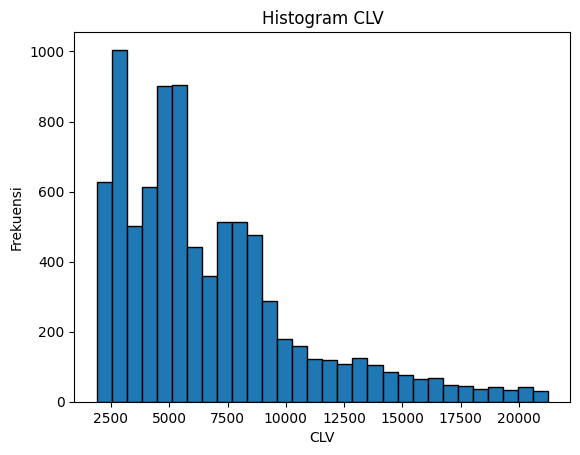

Skewness kolom clv adalah 1.3292863591978679


In [59]:
# Periksa Distriibusi Data
plt.hist(df['clv'], bins=30,edgecolor='black')
plt.title('Histogram CLV')
plt.xlabel('CLV')
plt.ylabel('Frekuensi')
plt.show()

# Periksa Skewness
skew1=df['clv'].skew()
print(f'Skewness kolom clv adalah {skew1}')

Dari histogram diatas dan nilai skewness kolom 'clv', terdapat indikasi bahwa data adalah positive skew sehingga tidak berdistribusi normal. Sehingga berikkutnya akan diperiksa apakah ada outlier untuk kolom 'clv'. Untuk menghilangkan outlier karena data tidak berdistribusi normal berdasarkan skewnessnya maka ada digunakan teknikk Turkey's Rule untuk periksa outlier.

In [63]:
# Hitung Q1, Q2, dan IQR
Q1=df['clv'].quantile(0.25)
Q3=df['clv'].quantile(0.75)
IQR=Q3-Q1

Upper= Q3+1.5*IQR
Lower= Q1-1.5*IQR

# Hitung maksimum dan minimum clv
max=df['clv'].max()
min=df['clv'].min()

# Tampilkan Maksimum, Minimum, Batas bawah, dan Batas atas
print(f'Maximmum clv adalah {max}')
print(f'Minimum clv adalah {min}')
print(f'Batas atasnya adalah {Upper} berdasarkakn Turkeys Rule')
print(f'Batas bawahnya adalah {Lower} berdasarkakn Turkeys Rule')


Maximmum clv adalah 21235.44557
Minimum clv adalah 1898.007675
Batas atasnya adalah 15353.755548500001 berdasarkakn Turkeys Rule
Batas bawahnya adalah -3039.1698355000008 berdasarkakn Turkeys Rule


Dari hasil diatas terlihat bahwa ada beberapa data yang melebihi batas atas sehingga dapat dianggap sebagai outlier. Tapi akan diselidiki lebih lanjut untuk membuat keputusan pembuangan outlier.

In [71]:
# Menampilkan data-data yang melewati batas atas
display(df[(df['clv']>Upper)])

mean_clv=df['clv'].mean()
print(f'Rata-rata clv adalah {mean_clv}')


,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Response_num
29,32,18975.45611,No,Extended,High School or Below,Employed,M,65999,Urban,Married,...,0,6,Corporate Auto,Corporate L2,Offer2,Agent,615.927769,Luxury SUV,Medsize,0
88,96,20946.19251,No,Basic,Bachelor,Employed,F,69738,Suburban,Married,...,1,2,Personal Auto,Personal L3,Offer1,Branch,492.127532,Four-Door Car,Large,0
159,169,19776.56654,No,Extended,High School or Below,Employed,F,70699,Urban,Divorced,...,0,2,Personal Auto,Personal L2,Offer3,Agent,256.813837,Four-Door Car,Medsize,0
161,172,15363.84716,No,Premium,Doctor,Disabled,F,15897,Urban,Divorced,...,0,2,Personal Auto,Personal L3,Offer2,Agent,303.148399,Four-Door Car,Medsize,0
171,182,16936.27147,No,Extended,Bachelor,Employed,F,39411,Suburban,Married,...,2,4,Personal Auto,Personal L3,Offer3,Branch,1122.658899,Luxury Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,9051,18677.85248,No,Extended,College,Unemployed,M,0,Suburban,Married,...,0,2,Personal Auto,Personal L2,Offer1,Agent,538.649619,Four-Door Car,Medsize,0
8559,9059,18484.80858,No,Basic,College,Employed,F,36153,Urban,Married,...,1,2,Corporate Auto,Corporate L3,Offer2,Agent,323.424189,Sports Car,Medsize,0
8565,9066,17223.06591,No,Basic,College,Employed,M,22346,Suburban,Single,...,0,2,Personal Auto,Personal L3,Offer4,Call Center,307.200000,Four-Door Car,Large,0
8621,9125,16261.58550,No,Extended,Master,Employed,M,60646,Suburban,Married,...,0,2,Personal Auto,Personal L3,Offer2,Agent,643.200000,SUV,Medsize,0


Rata-rata clv adalah 6725.281514952724
Persentase outlier adalah 4.843568945538818%


Dari hasil diatas terdapat 418 baris yang memiliki nilai outlier lebih dari batas atasnya. Sehingga akan dilakukan pembuangan outlier pada bagian data cleaning.

# 4. Data Preperation

Pada bagian ini, data akan diproses sehingga dapat digunakan untuk analisa lebih lanjut

## 4.1 Data Cleaning

Dari bagian data exlporasi, diketahui bahwa tidak banyak hal yang harus dilakukan kepda 'df'. Dapat dikatakan bahwa 'df' sudah data bersih. Tetapi terdapat indikasi adanyna outlier, sehingga akan dilakukkan proses pembuangan outlier.

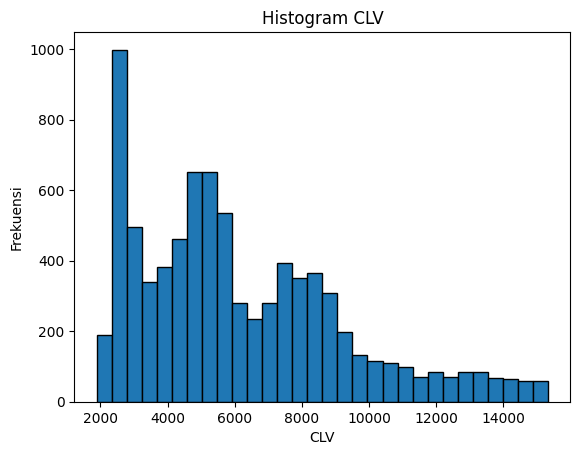

Skewness df tanpa outlier kolom clv adalah 0.8711641840551744
Persentase outlier adalah 4.843568945538818%


In [72]:
# Buat dataframe baru yang sudah tidak ada outlier
df_no_outlier = df[(df['clv'] >= Lower) & (df['clv'] <= Upper)].copy()

# Periksa Distriibusi Data
plt.hist(df_no_outlier['clv'], bins=30,edgecolor='black')
plt.title('Histogram CLV')
plt.xlabel('CLV')
plt.ylabel('Frekuensi')
plt.show()

# Periksa Skewness
skew2=df_no_outlier['clv'].skew()
print(f'Skewness df tanpa outlier kolom clv adalah {skew2}')

# Periksa persentase outlier
persentase_out=len(df[(df['clv']>Upper)])/len(df['clv'])*100
print(f'Persentase outlier adalah {persentase_out}%')

Dari hasil diatas dapat dilihat bawha setelah membuang outlier-oulier distribusi kolom 'clv' lebih membaik dalama arti skewnessnya mendekati distribusi norma walaupun, masih belum normal. Tapi salah satu alasan pembuangan outlier ini dilakukan adalah tujuan analisis ini adalah untuk meneliti kasus-kasus yang pada umumnya terjadi, di mana outlier ini hanya 4,84% dari seluruh data sehingga untuk kasus dengan clv yang sangat ekstrim lebih baik di buang. 

## 4.2 Exporting Data

Untuk melakukan visualisai di tablue akan download file csv dari 'df_no_outlier'. Tetapi sebelum itu harus disesuaikan dengan format tableau.

In [ ]:
df_tab = df_no_outlier.copy()

# Ubah semua kolom menjadi string
for col in df_tab.columns:
    df_tab[col] = df_tab[col].astype(str).str.replace('.', ',', regex=False)

df_tab.head()

df_tab.to_csv('data_tab.csv', index=False, sep=';', encoding='utf-8')

# 5. Analysis

## 5.1 Menjawab Penjabaran Masalah

### 5.1.1 Berapa nilai rata-rata CLV?

Pada bagian ini akan diperiksa nilai rata-rata CLV dari data sebelum dan sesudah membuang outlier. Disini nilia CLV dapat digunakan sebagai metrik keuntungan perusahaan karena berkorelasi dengan nilai yang diperoleh perusahaan dari pelanggan. Sehingga mencari nilai rata-rata CLV dapat membantu mengukur keuntungan perusahaan.

In [75]:
# Mencari rata-rata kolom CLV
mean_no_out_clv=df_no_outlier['clv'].mean()

print(f'Nilai rata-rata CLV sebelum pembuangan outlier adalah {mean_clv}')
print(f'Nilai rata-rata CLV setelah pembuangan outlier adalah {mean_no_out_clv}')

Nilai rata-rata CLV sebelum pembuangan outlier adalah 6725.281514952724
Nilai rata-rata CLV setelah pembuangan outlier adalah 6156.63872310302


Dari hasil diatas dapat dilihat nilai rata-rata clv sebelum dan sesudah membuang outlier. Terlihat bahwa terdapat penurunan nilai rata-rata, hal ini dikarenakan semua outlier yang dibuang adalah outliier yang melebihi batas atas sehingga wajar jika nilai rata-ratanya turun. Dalam kasus ini karena tujuan perusahaan adalah untuk meningkatkan rata-rata CLV sebesar 10% dalam 1 tahun, maka target nilai CLVnya adalah 6156,64 * 1.1 = 6772,304.

### 5.1.2 Dimana paling banyak terjadinya ajuan komplain?

Location.Code
Suburban    5195
Rural       1596
Urban       1421
Name: count, dtype: int64

<Axes: xlabel='Location.Code'>

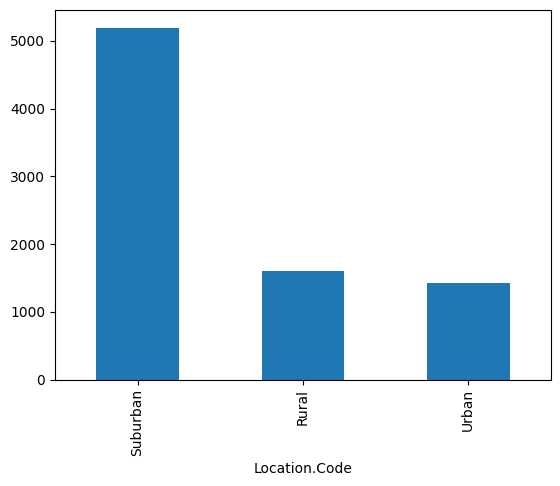

In [79]:
# Menampilkan frequensi ajuan komplain di setiap lokasi
display(df_no_outlier['Location.Code'].value_counts())

# Membuat bar chart untuk frequensi di setiap lokasi
df_no_outlier['Location.Code'].value_counts().plot(kind='bar')

Dapat dilihat dari hasil diatas bahwa ajuan paling banyak terjadi pada lokasi Suburban lalu diikutii Rural dan terakhir Urban. Dengan informasi ini, perusahaan dapat menyesuaikan harga premi di lokasi Suburban agar menurunkan risiko ke perusahaan. Dengan meningkatkan premi maka secara tidak langung CLV akan meningkat.

### 5.3.3 Rasio Perempuan/ Laki-laki?

Gender
F    4159
M    4053
Name: count, dtype: int64

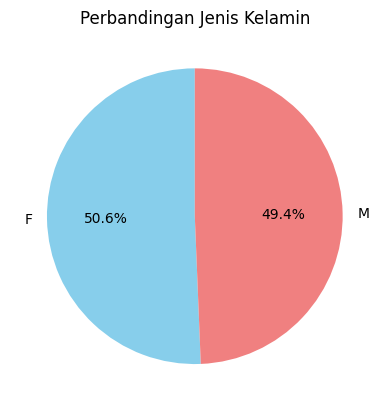

In [80]:
display(df_no_outlier['Gender'].value_counts())
df_no_outlier['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',   # tampilkan persentase
    startangle=90,       # biar mulai dari atas
    colors=['skyblue', 'lightcoral'],  # warna custom (opsional)
)

plt.title('Perbandingan Jenis Kelamin')
plt.ylabel('')  # hapus label sumbu y biar rapi
plt.show()

Pendistribusian jenis kelamin dapat dibilang terdistribusi secara merata, yang berarti bahwa jumlah laki-laki yang mengajukan komplain kurang lebih sama seperti jumlah perempuan.

### 5.3.4 Apakah ada perbedaan signifikan anatra rata-rata CLV laki-laki dan perempuan?

Untuk menjawab masalah ini, akan digunakan t test untuk melakukan uji hiptesa.
- H0 : Rata-rata CLV laki-laki =  Rata-rata CLV perempuan
- H1 : Rata-rata CLV laki-laki !=  Rata-rata CLV perempuan
Uji ini akan ditentukan dengan meilihat P-valuenya, jika P-value lebih besar dari  critical value (5%) maka H0 diterima. Jikka P-value lebih kecil maka H0 ditolak.

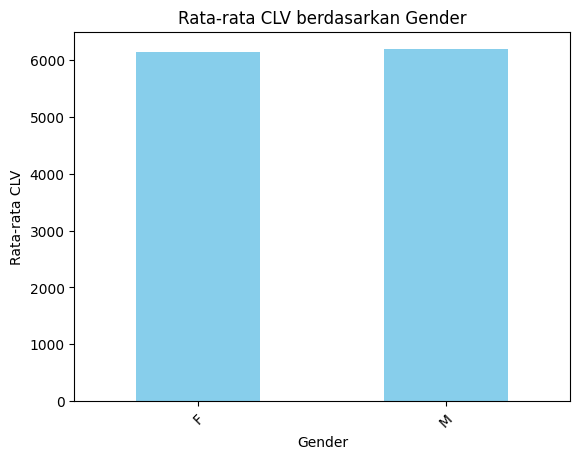

T-Statistic: 0.7236786062764025
P-value: 0.46928368857696656


In [81]:
df_no_outlier.groupby('Gender')['clv'].mean().plot(kind='bar', color='skyblue')

plt.title('Rata-rata CLV berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Rata-rata CLV')
plt.xticks(rotation=45)
plt.show()

df_male=df_no_outlier[df_no_outlier['Gender'] == 'M']['clv']
df_female=df_no_outlier[df_no_outlier['Gender'] == 'F']['clv']

t_stat,p_val = stats.ttest_ind(df_male,df_female)
print('T-Statistic:',t_stat)
print('P-value:',p_val) 

Dari hasil diatas dapat dilihat bahwa P-vluenya lebih besar dari 5% sehingga H0 diterima, yang berarti bahwa tidak ada perbedaan signifikan antara rata-rata nilai CLV laki-laki dan perempuan. Dan dapat dilihat juga dari bar chart diatas bahwa nilai rata-ratanya mirip. Dapat dibilang dengan kepercayaan 95% tidak ada perbedaan antara rata-rata CLV perempuan dan laki-laki. Sehingga perusahaan tidak harus membedakan harga premi laki-laki dari perempuan.

### 5.3.5 Apa saja faktor-faktor yang mempengaruhi nilai CLV?

Untuk memberiksa apa saja faktor-fakotr yang mempengaruhi nilai CLV, akan di periksa beberapa kolom seperti 'Monthly.Premi.Auto', 'Vehicle.Class', 'Marital.Status', dan 'Employment.Status'. Untuk kolom yang meiliki tipe data string akan menggunakan bar chart untuk mengambarkan hubungannya, sedangkakn untuk kolom yang memiliki tipe data numerik akan digunakan scatter plot untuk melihat korelasinya serta dengan nilai korelasinya.

#### 5.3.5.1 Kolom Dengan Tipe Data String

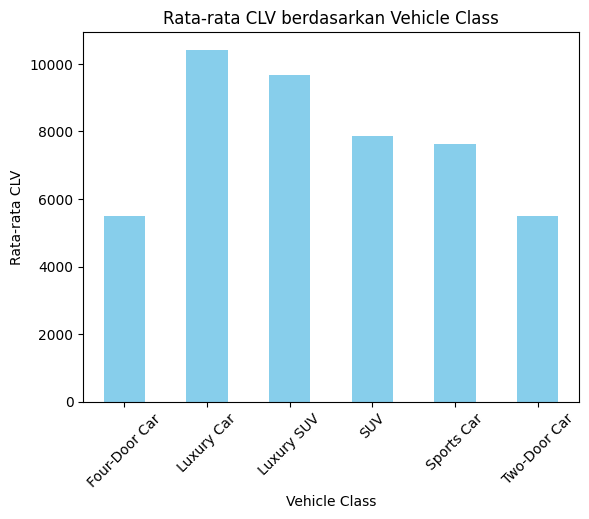

In [84]:
df_no_outlier.groupby('Vehicle.Class')['clv'].mean().plot(kind='bar', color='skyblue')
plt.title('Rata-rata CLV berdasarkan Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Rata-rata CLV')
plt.xticks(rotation=45)
plt.show()

Dari grafik diatas dapat dilihat bahwa kelals mobil 'Luxury' cenderung memiliki nilai rata-rata clv yang lebih tinggi dibandingkan dengan kelas yang lain. Hal ini dikarenakan untuk mobil yang lebih mewah pembeli polis ingin produk yang lebih baik.

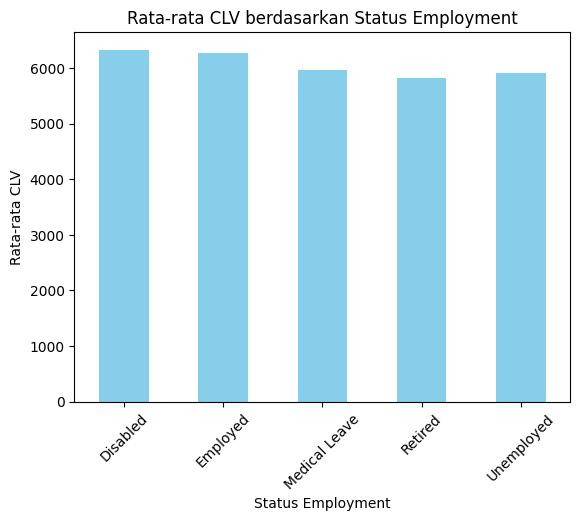

In [85]:
df_no_outlier.groupby('EmploymentStatus')['clv'].mean().plot(kind='bar', color='skyblue')
plt.title('Rata-rata CLV berdasarkan Status Employment')
plt.xlabel('Status Employment')
plt.ylabel('Rata-rata CLV')
plt.xticks(rotation=45)
plt.show()

Garfikk diatas menampilkan rata-rata CLV berdasarkan status kerjaan, dan dapat dilihat tidak terlalu beda nilai rata-ratanya.

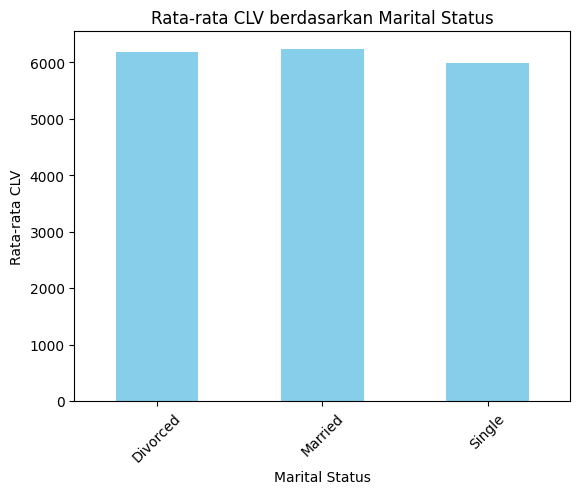

In [86]:
df_no_outlier.groupby('Marital.Status')['clv'].mean().plot(kind='bar', color='skyblue')
plt.title('Rata-rata CLV berdasarkan Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Rata-rata CLV')
plt.xticks(rotation=45)
plt.show()


Unutk kolom Marital Satus juga dapat dikatakan bahwa tidak terlalu menjadi faktor untuk clv karena rata-ratanya mirip-mirip.

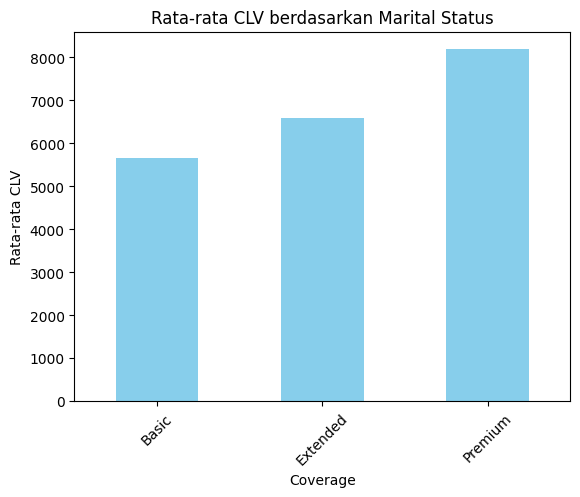

In [87]:
df_no_outlier.groupby('Coverage')['clv'].mean().plot(kind='bar', color='skyblue')
plt.title('Rata-rata CLV berdasarkan Marital Status')
plt.xlabel('Coverage')
plt.ylabel('Rata-rata CLV')
plt.xticks(rotation=45)
plt.show()

Dan terakhir untuk kolom coverage dapt dilihat bahwa tiper coverage adalah salah satu faktor nilai clv.

Sehingga dapat disimpulkkan bahwa dari beberapa faktor dengan tipe data string yang diuji ada beberapa kolom yang menjadi faktor nilai CLV seperti Coverage dan kelas mobil. Jadi untuk tipe coverage dan kelas mobil yang bebeda perusahaan dapat menyesuakan harga premi untuk meningkatkan CLV.

#### 5.3.5.2 Kolom Dengan Tipe Data Numerik

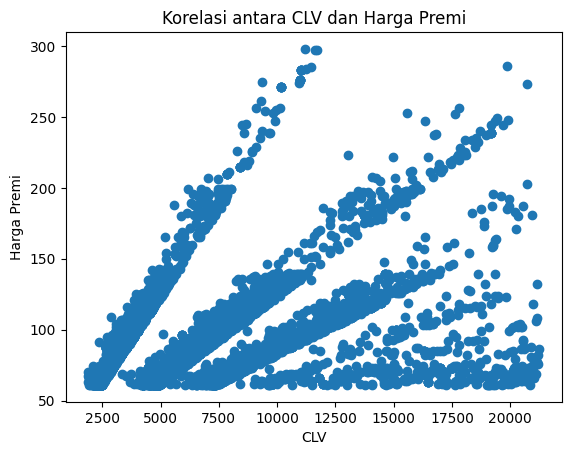

0.43911556162150867


In [103]:
#Menampilkan Scatter plot CLV vs Harga Premi
plt.scatter(df['clv'], df['Monthly.Premium.Auto'])
plt.title('Korelasi antara CLV dan Harga Premi')
plt.xlabel('CLV')
plt.ylabel('Harga Premi')
plt.show()

#Menghitung nilai korelasi CLV dan premi
cor_premi=df['clv'].corr(df['Monthly.Premium.Auto'],method='spearman')
print(cor_premi)

Dari scatter plot diatas terlihat bahwa ada beberapa grouping yang mengikuti pola positif. Hal ini mengindikasikan bahwa adanya korelasi antara CLV dan Harga Premi. Dari nilai korelasi sebesar 0,43911 ini mengindikasikan bahwa ada hubungan yang cukup kuat. Jadi, jika preusahaan meningkat kan harga premi bulanannya maka CLVnya juga akan naik. Maka cara terjelas adalah untuk meningkatkan harga premi tetapi harus diimbangkan juga karena jika terlalu malah maka tidak akan laku.

### 5.3.6 Apakah nilai CLV  mempengaruhi kemungkinan respon yes?

Pada bagian ini akan dilihat apakah ada perbedaan dalam cara respon berdasarkan nilai CLV. Untuk memeriksa apakah nilai CLV mepengaruhi response akan dilihar rata-rata clv untuk respons yes dan no. sehingga akan diuji hipotesa sebagai berikut:
- H0 : Rata-rata CLV Yes =  Rata-rata CLV No
- H0 : Rata-rata CLV Yes =  Rata-rata CLV No
Jika P-value diatas 5% maka H0 diterima, jika tidak maka H0 ditolak.

In [89]:
df_No=df_no_outlier[df_no_outlier['Response'] == 'No']['clv']
df_Yes=df_no_outlier[df_no_outlier['Response'] == 'Yes']['clv']

t_stat,p_val_Res = stats.ttest_ind(df_No,df_Yes)
print('P-value:',p_val_Res) 

P-value: 0.2446279831545118


Dengan P-value=0,2446 > 5%, H0 diterima sehingga tidak ada perbedaan antara rata-rata CLV untuk respon Yes atau No. Jadi dari sini dapat simpulkan dengan kepastian 95% tidak ada berbedaan signifikan antara nilai rata-rata CLV untukk respon Yes atau No. Sehingga nilai CLV tidak mempengaruhi keputusan perusahaan dalam menentukan Response.

# 6. Conclusion

Dari hasil analisa laporan ini ada beberapa kesimpulan yang dapat dilakukan perusahaan untuk menyapai tujuannya. Tapi sebelum ke analisanya, dalam proses pembersihan data terdapat pembuangan outlier. Hal ini dilakukan karena tujuan analisa ini adalah untuk meningkatkan CLV dengan kondisi/ kasus yang terjadi pada umumnya bukan kasus yang ektrim seperti outlier. Saat Analisa, kunci untuk meningkatkan CLV adalah meningkatkan harga premi. Sehingga dari hasil analisa terdaapt beberapa faktor-faktor yang mempengaruhi nilai CLV seperti Vechile CLass dan Coveragenya. Dengan Informasi ini perusahaan dapat menyesuaikan harga premi yang tepat kepada tipe-tipe coverage dan kelas mobil untuk mamaksimumkan nilai CLV. Tetapi harus dicatat bahwa peningkatan harga premi harus diimbangkan karena jika terlalu besar maka tidak ada yang beli produknya.